In [1]:
# Import library
import glob

# List all the .txt files and sort them alphabetically
files = glob.glob("Desktop/datasets2/*.txt")
files.sort()
print(files)

['Desktop/datasets2\\Autobiography.txt', 'Desktop/datasets2\\CoralReefs.txt', 'Desktop/datasets2\\DescentofMan.txt', 'Desktop/datasets2\\DifferentFormsofFlowers.txt', 'Desktop/datasets2\\EffectsCrossSelfFertilization.txt', 'Desktop/datasets2\\ExpressionofEmotionManAnimals.txt', 'Desktop/datasets2\\FormationVegetableMould.txt', 'Desktop/datasets2\\FoundationsOriginofSpecies.txt', 'Desktop/datasets2\\GeologicalObservationsSouthAmerica.txt', 'Desktop/datasets2\\InsectivorousPlants.txt', 'Desktop/datasets2\\LifeandLettersVol1.txt', 'Desktop/datasets2\\LifeandLettersVol2.txt', 'Desktop/datasets2\\MonographCirripedia.txt', 'Desktop/datasets2\\MonographCirripediaVol2.txt', 'Desktop/datasets2\\MovementClimbingPlants.txt', 'Desktop/datasets2\\OriginofSpecies.txt', 'Desktop/datasets2\\PowerMovementPlants.txt', 'Desktop/datasets2\\VariationPlantsAnimalsDomestication.txt', 'Desktop/datasets2\\VolcanicIslands.txt', 'Desktop/datasets2\\VoyageBeagle.txt']


In [2]:
# Import libraries
import re, os

# Initialize the object that will contain the texts and titles
txts = []
titles = []

for n in files:
    # Open each file
    f = open(n, encoding='utf-8-sig')
    # Store the texts and titles of the books in two separate lists
    txts.append(re.sub(r"[\W_]+[0-9]+[\.]+","",f.read()))
    titles.append(os.path.basename(n.replace(".txt","")))
# Print the length, in characters, of each book
[len(t) for t in txts]
titles


['Autobiography',
 'CoralReefs',
 'DescentofMan',
 'DifferentFormsofFlowers',
 'EffectsCrossSelfFertilization',
 'ExpressionofEmotionManAnimals',
 'FormationVegetableMould',
 'FoundationsOriginofSpecies',
 'GeologicalObservationsSouthAmerica',
 'InsectivorousPlants',
 'LifeandLettersVol1',
 'LifeandLettersVol2',
 'MonographCirripedia',
 'MonographCirripediaVol2',
 'MovementClimbingPlants',
 'OriginofSpecies',
 'PowerMovementPlants',
 'VariationPlantsAnimalsDomestication',
 'VolcanicIslands',
 'VoyageBeagle']

In [3]:
# Browse the list containing all the titles
for i in range(len(titles)):
    # Store the index if the title is "OriginofSpecies"
    # ... YOUR CODE FOR TASK 3 ...
    if(titles[i] == 'OriginofSpecies'):
        ori= i

ori

15

In [4]:
# Define a list of stop words
stoplist = set('for a of the and to in to be which some is at that we i who whom show via may my our might as well'.split())

# Convert the text to lower case 
txts_lower_case = [t.lower() for t in txts]

# Transform the text into tokens 
txts_split = [t.split() for t in txts_lower_case]
# Remove tokens which are part of the list of stop words
texts = [t.remove(list(stoplist)) for t in txts_split if t in list(stoplist)]
for text in txts_split:
    texts.append([word for word in text if word not in list(stoplist)])

texts[15][:20]


['on',
 'origin',
 'species.',
 '*',
 '*',
 '*',
 '*',
 '*',
 '"but',
 'with',
 'regard',
 'material',
 'world,',
 'can',
 'least',
 'go',
 'so',
 'far',
 'this--we',
 'can']

In [5]:

    
# Load the Lancaster stemming function from the nltk package
from nltk.stem import LancasterStemmer


# Create an instance of a Lancaster object
porter = LancasterStemmer()

# For each token of each text, we generated its stem 
texts_stem = [[porter.stem(token) for token in text] for text in texts]

In [6]:
from gensim import corpora

# Create a dictionary from the stemmed tokens
dictionary = corpora.Dictionary(texts_stem)

# Create a bag-of-words model for each book, using the previously generated dictionary
bows = [dictionary.doc2bow(doc) for doc in texts_stem]

bows[15][:20]


[(8, 1),
 (14, 1),
 (15, 1),
 (25, 1),
 (26, 10),
 (27, 2),
 (28, 1),
 (60, 1),
 (61, 1),
 (99, 3),
 (101, 10),
 (103, 23),
 (106, 3),
 (108, 3),
 (109, 2),
 (125, 1),
 (127, 3),
 (128, 2),
 (138, 2),
 (158, 1)]

In [7]:
# Import pandas to create and manipulate DataFrames
import pandas as pd

# Convert the BoW model for "On the Origin of Species" into a DataFrame
df_bow_origin = pd.DataFrame.from_dict(bows[15])
df_bow_origin.columns = ['index','occurrences']
df_bow_origin['token'] = [texts_stem[15][ind] for ind in df_bow_origin['index']]
df_bow_origin.sort_values('occurrences')
df_bow_origin.head(10)


,index,occurrences,token
0,8,1,"""but"
1,14,1,least
2,15,1,go
3,25,1,not
4,26,10,by
5,27,2,ins
6,28,1,interposit
7,60,1,intellig
8,61,1,ag
9,99,3,or


In [8]:
from gensim.models import TfidfModel

# Generate the tf-idf model
model = TfidfModel(bows)

model[bows[15]]


[(8, 0.0006333159625123285),
 (14, 0.0006333159625123285),
 (15, 0.000456347962394657),
 (25, 0.00011161319272693786),
 (26, 0.0005433732282281183),
 (27, 0.0016917911389374833),
 (28, 0.0005411408480612975),
 (60, 0.0009706685033956572),
 (61, 0.00030475472140744405),
 (106, 0.0013690438871839707),
 (108, 0.000914264164222332),
 (109, 0.00022322638545387572),
 (125, 0.0005411408480612975),
 (138, 0.00034432740740792615),
 (158, 0.000456347962394657),
 (161, 0.0009706685033956572),
 (162, 0.0006333159625123285),
 (167, 0.0006333159625123285),
 (169, 0.0018999478875369854),
 (214, 0.0019413370067913145),
 (216, 0.00023638612665385336),
 (224, 0.0008458955694687416),
 (226, 0.0022242487781896194),
 (237, 0.0007342823767418038),
 (245, 0.0012497584249246722),
 (246, 0.0017931316531527906),
 (247, 0.0009706685033956572),
 (248, 0.0006886548148158523),
 (249, 0.002550846449606203),
 (250, 0.0034099017602749215),
 (255, 0.00023638612665385336),
 (257, 0.00070915837996156),
 (258, 0.000760722

In [9]:
df_tfidf = pd.DataFrame(model[bows[15]])

df_tfidf.columns = ['id','score']
df_tfidf['token'] = [texts_stem[15][ind] for ind in df_tfidf['id']]

# Add the tokens corresponding to the numerical indices for better readability
df_tfidf.sort_values('score')
df_tfidf.head(10)[::-1]


,id,score,token
9,106,0.001369,or
8,61,0.000305,ag
7,60,0.000971,intellig
6,28,0.000541,interposit
5,27,0.001692,ins
4,26,0.000543,by
3,25,0.000112,not
2,15,0.000456,go
1,14,0.000633,least
0,8,0.000633,"""but"


In [10]:
# Load the library allowing similarity computations
from gensim import similarities

# Compute the similarity matrix (pairwise distance between all texts)
sims = similarities.MatrixSimilarity(model[bows])

sim_df = pd.DataFrame.from_records(list(sims))

sim_df.columns = titles
sim_df.index = titles

sim_df


,Autobiography,CoralReefs,DescentofMan,DifferentFormsofFlowers,EffectsCrossSelfFertilization,ExpressionofEmotionManAnimals,FormationVegetableMould,FoundationsOriginofSpecies,GeologicalObservationsSouthAmerica,InsectivorousPlants,LifeandLettersVol1,LifeandLettersVol2,MonographCirripedia,MonographCirripediaVol2,MovementClimbingPlants,OriginofSpecies,PowerMovementPlants,VariationPlantsAnimalsDomestication,VolcanicIslands,VoyageBeagle
Autobiography,1.000000,0.022380,0.057741,0.018414,0.014318,0.041098,0.024851,0.018389,0.021813,0.007876,0.362981,0.180144,0.005835,0.007271,0.015557,0.037276,0.006721,0.018462,0.029449,0.124138
CoralReefs,0.022380,1.000000,0.008905,0.002987,0.002187,0.004246,0.022788,0.008167,0.062776,0.002411,0.035158,0.019536,0.006222,0.008807,0.002461,0.017678,0.002140,0.005439,0.060343,0.173923
DescentofMan,0.057741,0.008905,1.000000,0.028815,0.011722,0.078452,0.032228,0.051349,0.013752,0.010002,0.059490,0.068514,0.032458,0.028796,0.008522,0.092700,0.009600,0.092376,0.011337,0.096647
DifferentFormsofFlowers,0.018414,0.002987,0.028815,1.000000,0.270337,0.002645,0.005594,0.006565,0.013557,0.020857,0.008930,0.020794,0.004162,0.003135,0.006196,0.024148,0.006961,0.014510,0.004508,0.007780
EffectsCrossSelfFertilization,0.014318,0.002187,0.011722,0.270337,1.000000,0.002214,0.011035,0.004999,0.022352,0.041847,0.008314,0.011637,0.001656,0.001941,0.007839,0.019786,0.012073,0.020379,0.003385,0.007379
ExpressionofEmotionManAnimals,0.041098,0.004246,0.078452,0.002645,0.002214,1.000002,0.016701,0.014702,0.005360,0.007240,0.040631,0.027193,0.010199,0.013723,0.006453,0.018717,0.006045,0.028222,0.004968,0.052388
FormationVegetableMould,0.024851,0.022788,0.032228,0.005594,0.011035,0.016701,1.000000,0.014989,0.060122,0.030454,0.025641,0.019545,0.017592,0.017876,0.041306,0.022587,0.031918,0.027522,0.061402,0.079292
FoundationsOriginofSpecies,0.018389,0.008167,0.051349,0.006565,0.004999,0.014702,0.014989,1.000001,0.015273,0.003054,0.024291,0.020283,0.004247,0.007254,0.003687,0.054811,0.003871,0.054282,0.008736,0.035022
GeologicalObservationsSouthAmerica,0.021813,0.062776,0.013752,0.013557,0.022352,0.005360,0.060122,0.015273,1.000000,0.009434,0.034468,0.017954,0.008229,0.018517,0.004940,0.030095,0.005800,0.007823,0.336607,0.215681
InsectivorousPlants,0.007876,0.002411,0.010002,0.020857,0.041847,0.007240,0.030454,0.003054,0.009434,1.000000,0.007182,0.014409,0.015617,0.013352,0.268925,0.009139,0.175703,0.008290,0.009190,0.014826


Text(0.5, 1.0, 'What should i read after Origin Of Species?')

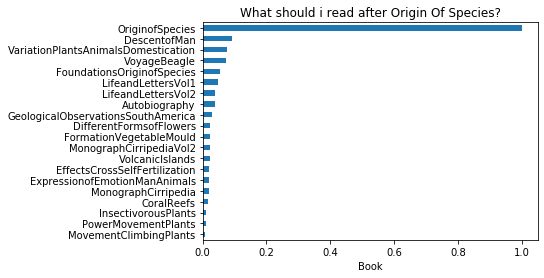

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt

v = sim_df['OriginofSpecies']

# Sort by ascending scores
v_sorted = v.sort_values()

# Plot this data has a horizontal bar plot

v_sorted.plot.barh(x = v_sorted.index, y ='OriginofSpecies' )

plt.xlabel('Similarity')
plt.xlabel('Book')
plt.title("What should i read after Origin Of Species?")



{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [70.0, 70.0, 92.5, 92.5],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [145.0, 145.0, 155.0, 155.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [150.0, 150.0, 173.75, 173.75],
  [122.5, 122.5, 161.875, 161.875],
  [81.25, 81.25, 142.1875, 142.1875],
  [42.5, 42.5, 111.71875, 111.71875],
  [12.5, 12.5, 77.109375, 77.109375]],
 'dcoord': [[0.0, 0.3909871933233475, 0.3909871933233475, 0.0],
  [0.0, 1.3125780610736544, 1.3125780610736544, 0.3909871933233475],
  [0.0, 0.6663950498320943, 0.6663950498320943, 0.0],
  [0.0, 1.1471336104143224, 1.1471336104143224, 0.6663950498320943],
  [0.0, 0.9425378266901084, 0.9425378266901084, 0.0],
  [0.0, 1.2005114456558605, 1.2005114456558605, 0.0],
  [0.0, 1.4119047972594

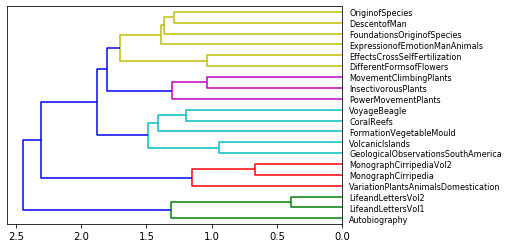

In [12]:
from scipy.cluster import hierarchy

# Compute the clusters from the similarity matrix,
# using the Ward variance minimization algorithm
Z = hierarchy.linkage(sim_df,'ward')

# Display this result as a horizontal dendrogram
hierarchy.dendrogram(Z,leaf_font_size=8,labels=sim_df.index,orientation='left')
